One of my favorite sites in Berlin is the City Wall. It has a rich history with the modern art gallery that it has been turned into being a photographer's paradise. I took several pictures of a peace dove over a period of 3 hours. This ranged from 16:00 to 19:00, with the sun setting at around 17:45.

On to the fun Machine Learning part.

The first part is importing all the tools I will be using. I have commented in the purposes of each of the imports.

In [1]:
%matplotlib inline 
#To plot within the notebook
from sklearn.decomposition import PCA # Surmoning the Principal Component Gods
import skimage.transform as imtran # The wizard of Image transformation. They do a mean Image resize
import numpy as np # Our package who art in numbers
import matplotlib.pyplot as plt # Let there be plots...
from PIL import Image # This one is a bit boring, Opens images, bla bla bla, the usual.
from mpl_toolkits.mplot3d import Axes3D # 3D projections that are actually better than imax!
import glob #An earth wannabe, 'global environment' package.

I made use of the different colors to represent different images in my plots so the number of images I plot was limited by the number of colors I can include. I have a total of about 40 images, but I worked with 12 here to keep things neat. If you add a new, unique color, another image will be included in the processing.

The first 3 are the outliers. I made the first black, dimgrey and brow for diversity purposes. I'm kidding, It was just easy to tell appart in case some of the points crisscross with the base images of the Berlin Wall.


display_image() is my display tool. It pltos the images in columns of 3 and as many rows as needed.

standard_importer() does the file fetrching from the local directory. You can change this to the path folder name of your choice though I've included my image set for replication purposes.
I converted the images to monochrome hence the 'L' option. I also resize the to 512 by 512 pixels using my image transformer.  The reflect mode so that points outside the boundary/edges, in case there are any, will be filled by a reflection of the image assuming the edge is a 'mirror'.

/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


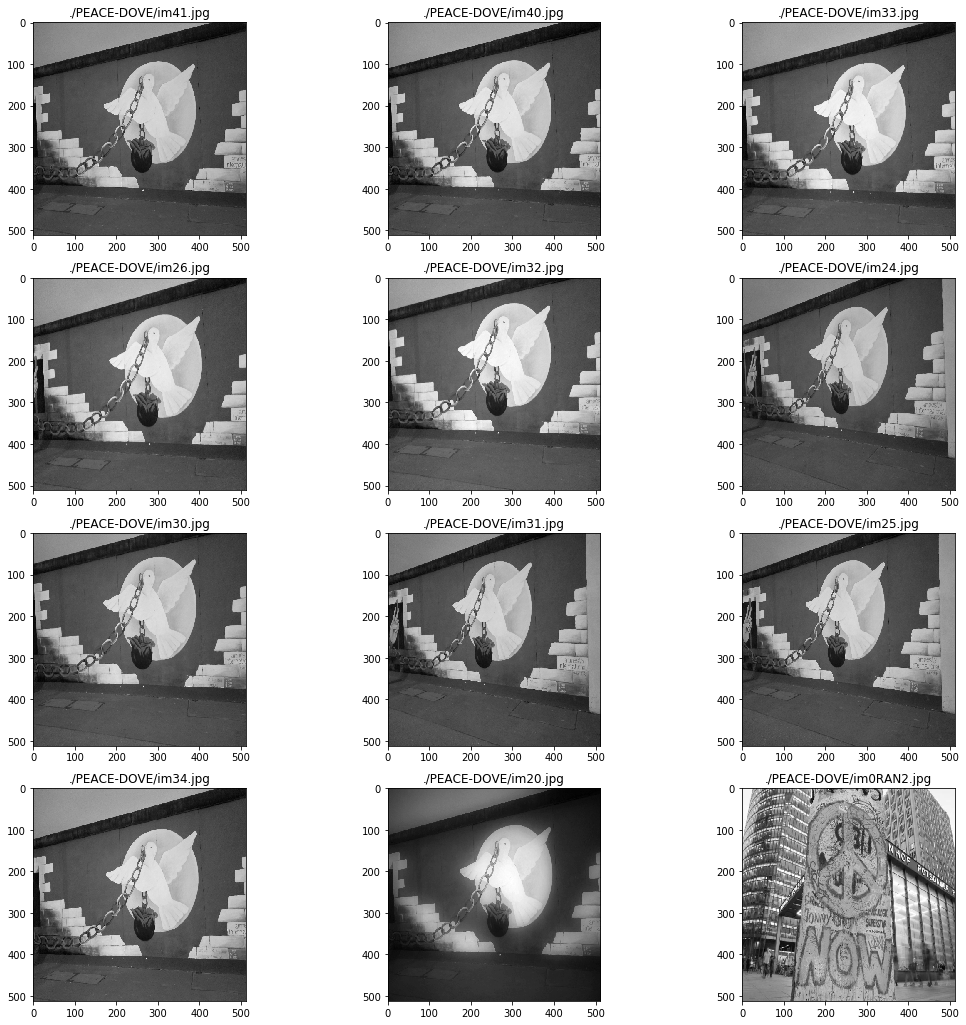

In [2]:
color_set = ['black','dimgrey', 'brown','darkgrey', 'y', 'red', 'blue', 'green','orchid','orange','maroon',
             'khaki', 'peru', 'cyan']
def display_image(images, im_names, rows = 1, columns = 3):
    %matplotlib inline
    fig=plt.figure(figsize=(18, 18))
    count = 0
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        plt.imshow(images[count],cmap = plt.cm.gray)
        plt.title(im_names[count])
        count+=1
    plt.show()
def standard_importer(path='./PEACE-DOVE'):
    image_list, image_names = [], []
    for file in glob.glob(f'{path}/*.jpg'):
        image_resized = imtran.resize(np.array(Image.open(file).convert('L')), (512,512), mode = "reflect")
        image_list.append(image_resized)
        image_names.append(file.split('\\')[-1])
    return image_list, image_names
peace_doves, dove_names = standard_importer()
display_image(peace_doves, im_names=dove_names, rows=(len(color_set)//3))

In [3]:
flat_peace_doves = [img.ravel() for img in peace_doves]
pca_reduction = PCA(n_components=3)
reduced_data = pca_reduction.fit_transform(flat_peace_doves)
reduced_data = reduced_data

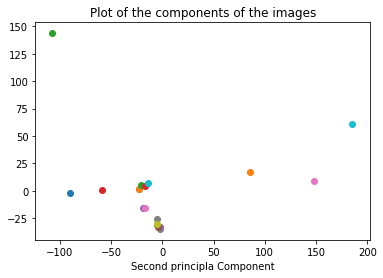

In [4]:
#Plot components
for component in reduced_data:
    plt.scatter(component[0],component[1])
plt.xlabel("First Principal Component")
plt.xlabel("Second principla Component")
plt.title("Plot of the components of the images")
plt.show()

In [5]:
inv_transform = pca_reduction.inverse_transform(reduced_data)

Now to reconstruct the data

In [6]:
unflattened = np.array([flat_img.reshape(512, 512) for flat_img in inv_transform])

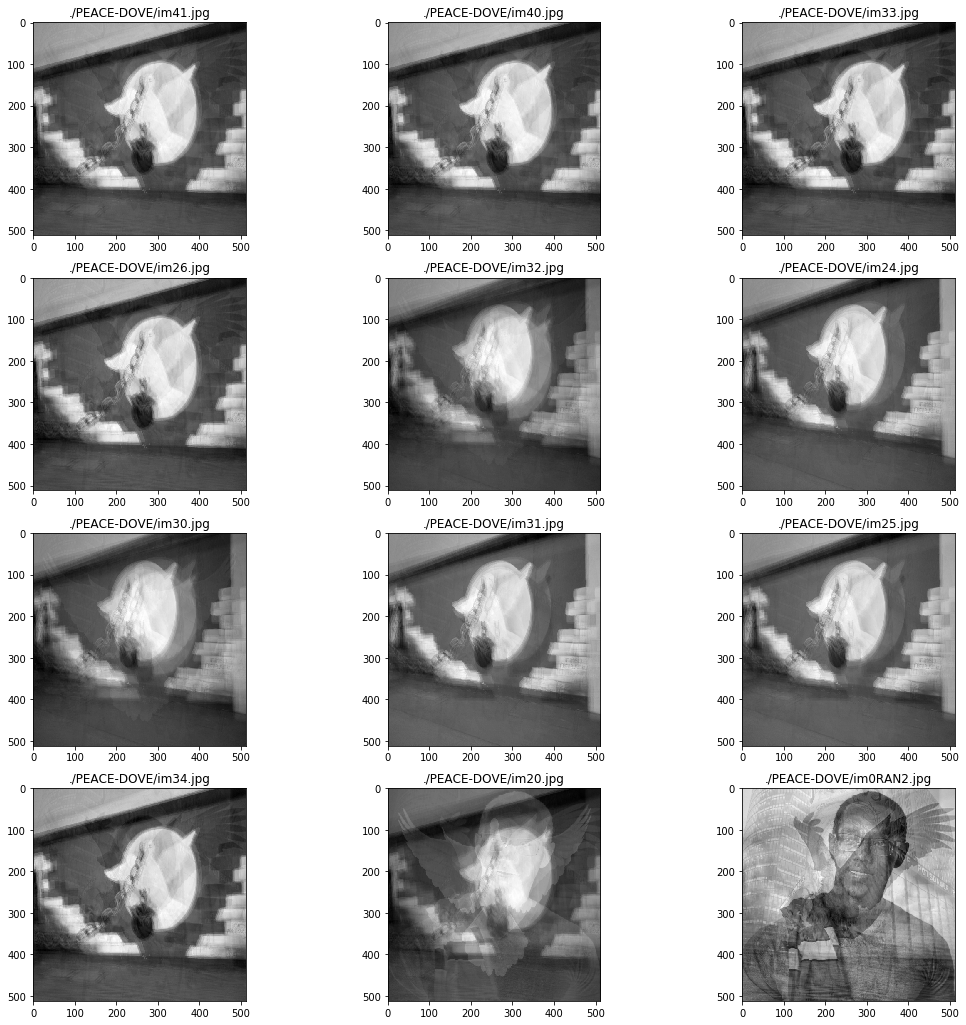

In [7]:
display_image(unflattened, im_names=dove_names, rows=len(color_set)//3)